In [1]:
import pybedtools
import matplotlib.pyplot as plt
import matplotlib_venn as vplt

In [2]:
def ven_subplot(title, sets, labels):
    plt.title(title)
    v = vplt.venn2(subsets=sets, set_labels=labels, set_colors=('w', 'w'))
    v.get_label_by_id('10').set_x(0.25)
    v.get_label_by_id('01').set_x(-.25)
    v.get_label_by_id('11').set_x(0)
    v.set_labels[0].set_position((-0.22, -0.45))
    v.set_labels[1].set_position((0.25, -0.45))


    c = vplt.venn2_circles(subsets=(2, 2, 1), linestyle='solid')
    c[0].set_radius(0.32)
    c[1].set_radius(0.32)
    c[0].set_lw(2.0)
    c[1].set_lw(2.0)
    c[0].set_color('green')
    c[1].set_color('red')
    c[0].set_alpha(0.5)
    c[1].set_alpha(0.5)
    c[0].set_edgecolor('black')
    c[1].set_edgecolor('black')

In [3]:
def plot3(title, new_features_file, catalog_features_file, validated_features_file, und_wo=True, und_v=False):
    new_features = pybedtools.BedTool(new_features_file)
    catalog_features = pybedtools.BedTool(catalog_features_file)
    validated_features = pybedtools.BedTool(validated_features_file)

    new_vs_validated = validated_features.intersect(new_features, wo=und_wo, v=und_v)
    catalog_vs_validated = validated_features.intersect(catalog_features, wo=und_wo, v=und_v)
    new_vs_catalog = catalog_features.intersect(new_features, wo=und_wo, v=und_v)

    print("new: " + str(new_features.count()) + " validated: "+ str(validated_features.count()) + " catalog:" + str(catalog_features.count()))

    plt.figure(figsize=(15,10))
    plt.subplot(2, 2, 1)
    
    atotal=validated_features.count()
    btotal=new_features.count()
    ab=new_vs_validated.count() if not und_v else atotal - new_vs_validated.count()
    a=atotal-ab
    b=btotal-ab
    ven_subplot('New Features Vs. Validated Features', (a,b,ab), ('New Calls (' + str(btotal) +')', 'Validated ('+ str(atotal) +')'))

    plt.subplot(2, 2, 2)
    
    atotal=validated_features.count()
    btotal=catalog_features.count()
    ab=catalog_vs_validated.count() if not und_v else atotal - catalog_vs_validated.count()
    a=atotal-ab
    b=btotal-ab
    ven_subplot('Catalog Vs. Validated Features', (a,b,ab), ('Catalog (' + str(btotal) +')', 'Validated ('+ str(atotal) +')'))

    plt.subplot(2, 1, 2)
    
    atotal=catalog_features.count()
    btotal=new_features.count()
    ab=new_vs_catalog.count() if not und_v else atotal - new_vs_catalog.count()
    a=atotal-ab
    b=btotal-ab
    ven_subplot('New Features Vs. Catalog', (a,b,ab), ('New Calls (' + str(btotal) +')', 'Catalog ('+ str(atotal) +')'))

    plt.suptitle(title)

    
    return new_vs_validated, catalog_vs_validated, new_vs_catalog

In [6]:
merged_ins = '../../data/DBA2J/bed/full/merged_one/INS_DBA2J.bed'
merged_del = '../../data/DBA2J/bed/full/merged_one/DEL_DBA2J.bed'

catalog_ins = '../../data/previous-catalog/full/DBA2J/catalog/INS_DBA2J.bed'
catalog_del = '../../data/previous-catalog/full/DBA2J/catalog/DEL_DBA2J.bed'

validated_h6 = '../../data/DBA2J/validated/50/remapped_DBA_2J.H6.mm10.bed'
validated_h7 = '../../data/DBA2J/validated/50/remapped_DBA_2J.H7.mm10.bed'
validated_h1 = '../../data/DBA2J/validated/50/remapped_DBA_2J.H1.mm10.bed'
validated_h2 = '../../data/DBA2J/validated/50/remapped_DBA_2J.H2.mm10.bed'

intersects_dir = '../../data/DBA2J/bed/50/intersects'

# Evaluation of merged features
## H6 Insertions of unique sequence (de novo sequence):

new: 78165 validated: 26 catalog:9406

Output data intersect -v:
Validated vs New (INS)======>:
4	108451404	108451405	100/200
7	98768784	98768785	550

Validated vs Previous (INS)======>:
3	149017827	149017828	100
4	108451404	108451405	100/200
6	145486712	145486713	500
7	98768784	98768785	550
8	73207739	73207740	1000
8	109550435	109550436	150
9	41311250	41311251	50
12	109926718	109926719	50
19	38036363	38036364	178

New vs Previous (INS - Head())======>:
1	3766453	3766495	2
 1	3948171	3948213	2
 1	5145111	5145153	2
 1	5901344	5901408	24
 1	5946866	5946917	11
 1	8256044	8256086	2
 1	9077925	9077967	2
 1	9705670	9705712	2
 1	10931296	10931338	2
 1	12039138	12039182	4
 

<BedTool(../../data/DBA2J/bed/50/intersects/INS_merged_vs_catalog.bed)>

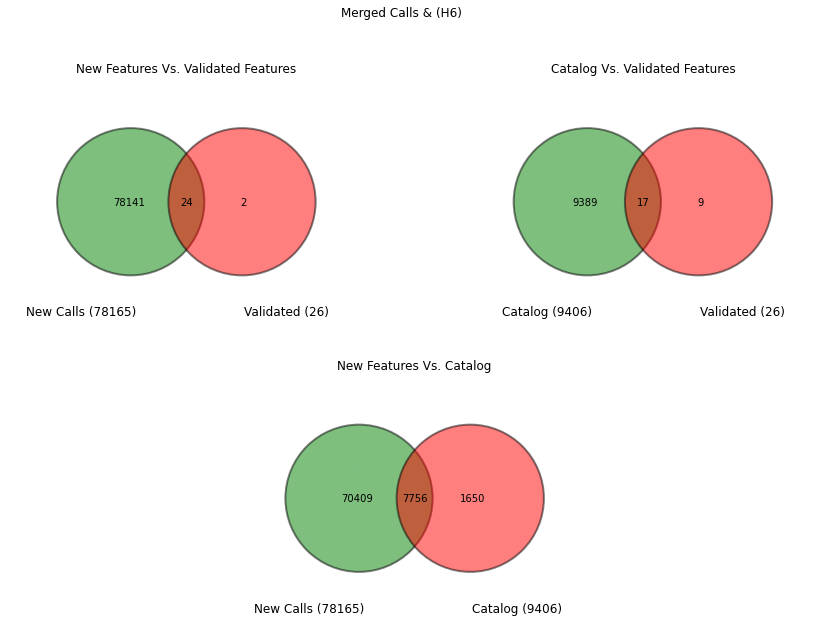

In [7]:
new_vs_validated, catalog_vs_validated, new_vs_catalog = plot3("Merged Calls & (H6)", merged_ins, catalog_ins, validated_h6, True, True)

print("\nOutput data intersect -v:")
print("Validated vs New (INS)======>:\n" + str(new_vs_validated))

print("Validated vs Previous (INS)======>:\n" + str(catalog_vs_validated))

print("New vs Previous (INS - Head())======>:")
new_vs_catalog.head()


new_vs_validated.saveas(intersects_dir + '/INS_merged_vs_H6.bed')
catalog_vs_validated.saveas(intersects_dir + '/INS_catalog_vs_H6.bed')
new_vs_catalog.saveas(intersects_dir + '/INS_merged_vs_catalog.bed')

new: 75350 validated: 78 catalog:17540

Output data intersect -v:
Validated vs New (INS)======>:
2	162312705	162312857	153
9	105647016	105647691	676
12	26363795	26363855	61
12	26397262	26397490	229

Validated vs Previous (INS)======>:
2	162318230	162318300	71
4	114022094	114023640	1547
5	101021103	101021194	92
8	30958463	30958545	83
8	30958463	30958545	83
10	82421207	82423382	2176
12	26363795	26363855	61
12	26405593	26405656	64
19	11928896	11928988	93

New vs Previous (INS - Head())======>:
1	4828317	4828572	255
 1	5853450	5854192	742
 1	6588061	6588303	242
 1	8010551	8010673	122
 1	9821627	9821791	164
 1	13408429	13409458	1029
 1	16108481	16108686	205
 1	19217706	19218137	431
 1	21265542	21272604	7062
 1	27729896	27730022	126
 

<BedTool(../../data/DBA2J/bed/50/intersects/DEL_merged_vs_catalog.bed)>

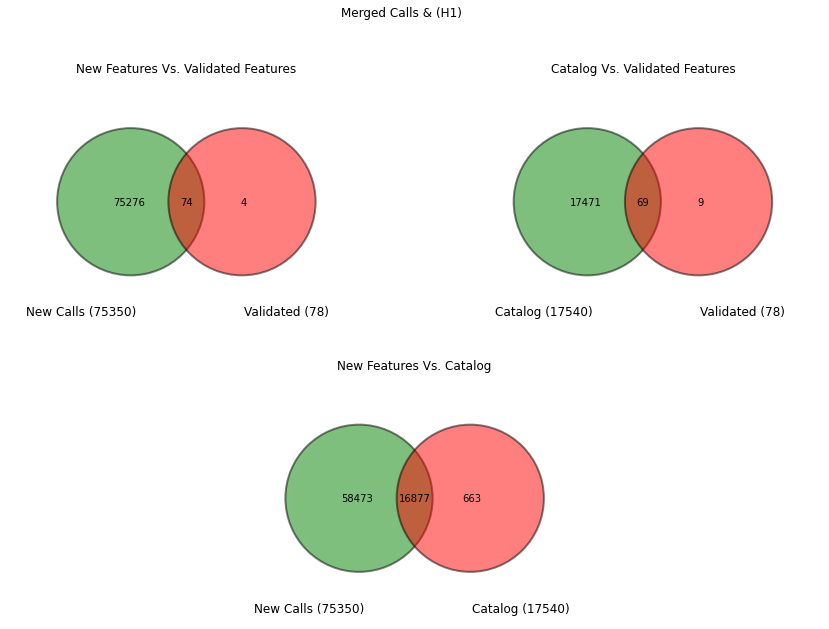

In [18]:
new_vs_validated, catalog_vs_validated, new_vs_catalog = plot3("Merged Calls & (H1)", merged_del, catalog_del, validated_h1, True, True)

print("\nOutput data intersect -v:")
print("Validated vs New (INS)======>:\n" + str(new_vs_validated))

print("Validated vs Previous (INS)======>:\n" + str(catalog_vs_validated))

print("New vs Previous (INS - Head())======>:")
new_vs_catalog.head()


new_vs_validated.saveas(intersects_dir + '/DEL_merged_vs_H6.bed')
catalog_vs_validated.saveas(intersects_dir + '/DEL_catalog_vs_H6.bed')
new_vs_catalog.saveas(intersects_dir + '/DEL_merged_vs_catalog.bed')